In [21]:
#task 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/project_Data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


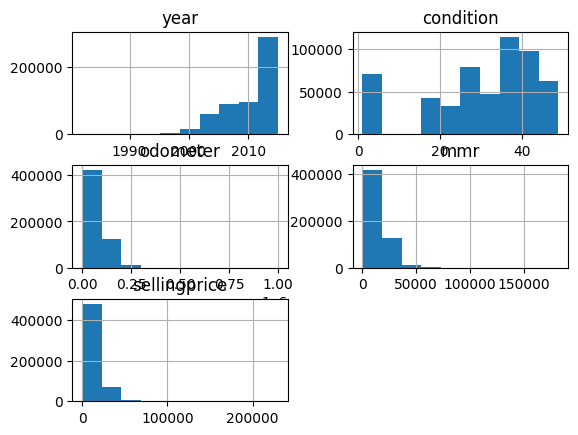

In [22]:
#task 2
df.isnull().sum()
df.hist()
df.describe()


In [23]:
#task 3
cond1 = df['condition'] < 0
df[cond1]
cond2 = df['odometer'] < 0
df[cond2]
cond3 = df['mmr'] < 0
df[cond3]
cond4 = df['sellingprice'] < 0
df[cond4]


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [24]:
#task 4
df.shape

(558837, 16)

In [25]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [26]:
#task 6
X_train.corr()

<ipython-input-26-078838e45a8b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,year,condition,odometer,mmr,sellingprice
year,1.000000,0.339940,-0.771458,0.596727,0.586593
condition,0.339940,1.000000,-0.316835,0.281528,0.321984
odometer,-0.771458,-0.316835,1.000000,-0.586940,-0.581279
mmr,0.596727,0.281528,-0.586940,1.000000,0.983502
sellingprice,0.586593,0.321984,-0.581279,0.983502,1.000000


Data type of year is not suitable for plotting.
Data type of condition is not suitable for plotting.
Data type of odometer is not suitable for plotting.
Data type of mmr is not suitable for plotting.
Data type of sellingprice is not suitable for plotting.


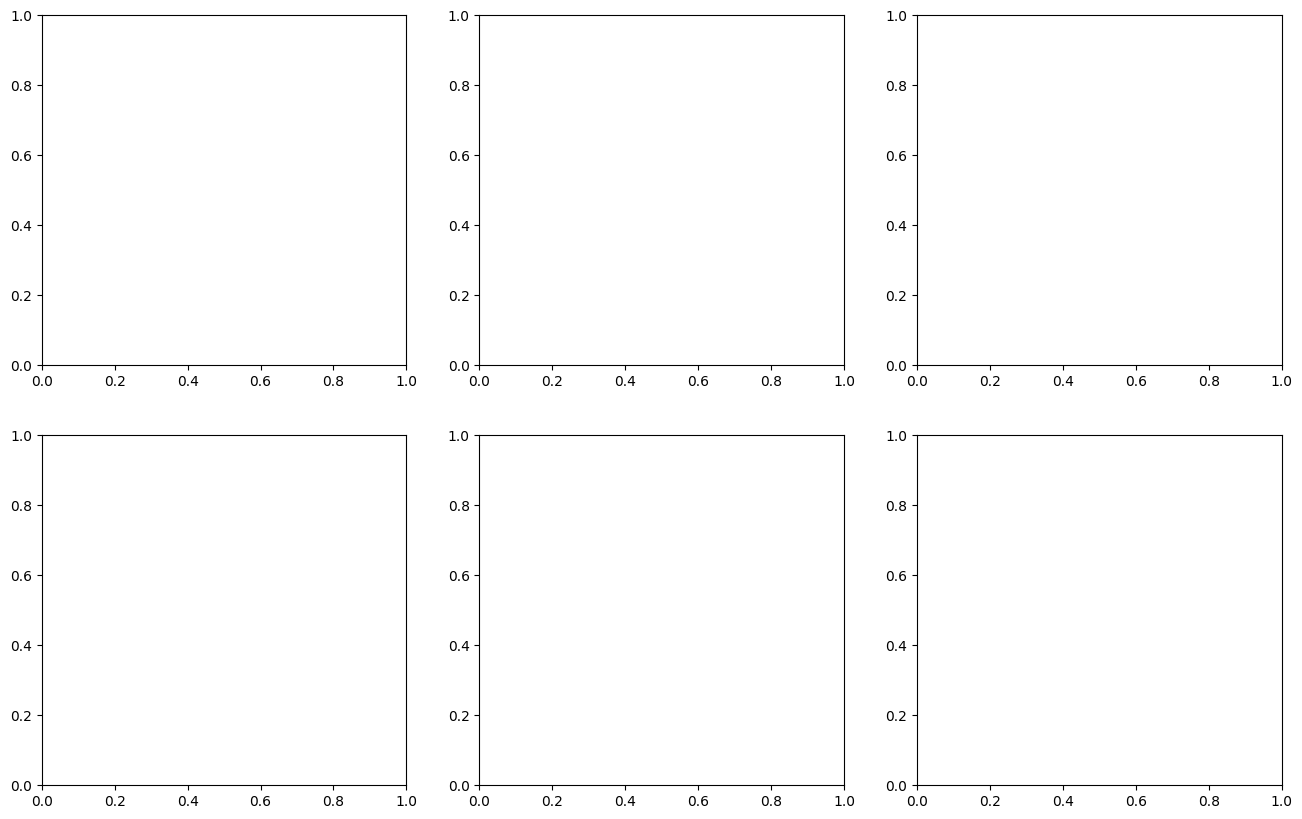

In [27]:
import matplotlib.pyplot as plt

columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

i = 0

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

for row in range(0, 2):
    for col in range(0, 3):
        if i < len(columns):
            x_data = X_train[columns[i]]
            if isinstance(x_data, (int, float)):
                axs[row, col].scatter(x_data, y_train, s=4)
                axs[row, col].set_xlabel(columns[i])
                axs[row, col].set_ylabel('Rating')
            else:
                print(f"Data type of {columns[i]} is not suitable for plotting.")
            i += 1

plt.show()


In [28]:
#task 8
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_col = ['No Of Reviews', 'No Of Installs', 'Size', 'Price', 'Days since Last Update']
cat_col = ['Category']
missing_num_col = [col for col in num_col if col not in X_train.columns]
missing_cat_col = [col for col in cat_col if col not in X_train.columns]

if missing_num_col:
    print(f"Numerical columns {missing_num_col} are missing in X_train")
if missing_cat_col:
    print(f"Categorical columns {missing_cat_col} are missing in X_train")

if not missing_num_col and not missing_cat_col:
    imp = SimpleImputer(strategy='mean')
    tf_num = imp.fit_transform(X_train[num_col])

    scaler = StandardScaler()
    tf_num = scaler.fit_transform(tf_num)

    ohe = OneHotEncoder(sparse=False, drop='first')
    tf_cat = ohe.fit_transform(X_train[cat_col])

    X_train_transformed = np.concatenate((tf_num, tf_cat), axis=1)
    print(X_train_transformed[0])


Numerical columns ['No Of Reviews', 'No Of Installs', 'Size', 'Price', 'Days since Last Update'] are missing in X_train
Categorical columns ['Category'] are missing in X_train


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_transformed, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


NameError: name 'tf_num' is not defined

In [5]:
#task 10
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train_transformed)

rmse = mean_squared_error(y_train, y_train_pred, squared = False)
r2 = r2_score(y_train, y_train_pred)

print(rmse)
print(r2)
test_tf_num = imp.transform(X_test[num_col])
test_tf_num = scaler.transform(test_tf_num)
test_tf_cat = ohe.transform(X_test[cat_col])

X_test_transformed = np.concatenate((test_tf_num, test_tf_cat), axis=1)

y_test_pred = model.predict(X_test_transformed)

rmse = mean_squared_error(y_test, y_test_pred, squared = False)
r2 = r2_score(y_test, y_test_pred)

print(rmse)
print(r2)

NameError: name 'model' is not defined

In [4]:
#task 11
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_preprocessing = Pipeline(
    [('imp', SimpleImputer(strategy='mean')),
     ('scaler', StandardScaler())])

full_preprocessing = ColumnTransformer(
    [('num', num_preprocessing, num_col),
     ('cat', OneHotEncoder(sparse=False, drop='first'), cat_col)])

final_pipeline = Pipeline(
    [('pre', full_preprocessing),
     ('model', LinearRegression())])

NameError: name 'SimpleImputer' is not defined

In [3]:
#task 12
final_pipeline.fit(X_train, y_train)

NameError: name 'final_pipeline' is not defined

In [2]:
#task 13
y_train_pred = final_pipeline.predict(X_train)

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

print(rmse)
print(r2)
y_test_pred = final_pipeline.predict(X_test)

rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print(rmse)
print(r2)

NameError: name 'final_pipeline' is not defined

In [1]:
#task 14
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_pipeline, X_train, y_train, cv=4, scoring="neg_root_mean_squared_error")
neg_rmse_cv = scores.mean()
print(-neg_rmse_cv)

scores = cross_val_score(final_pipeline, X_train, y_train, cv=4, scoring="r2")
r2_cv = scores.mean()
print(r2_cv)

NameError: name 'final_pipeline' is not defined